In [10]:
from sklearn.model_selection import train_test_split
from sklearn import datasets

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


np.random.seed(123)

In [30]:
class LinearRegression:
    
    def __init__(self, lr = 0.001, n_iters = 1000):
        
        self.lr = lr
        self.n_iters = n_iters
        
        self.weight = None
        self.bias = None
        
    def fit(self, X, y):
        # y = w*X + b
        n_samples, n_features = X.shape
        
        self.weight = np.zeros(n_features)
        self.bias = 0
        
        
        #gradient descent
        
        for e in range(self.n_iters):
            
            y_pred = np.dot(X, self.weight) + self.bias #(n_samples, n_features) *(n_features) + 0 = (n_samples)
            
            #compute gradient
            #loss(MSE) = (1/N)*(y_pred(w*X + b) - y_true)**2
            
            dw = (1/n_samples) * np.dot(X.T, (y_pred - y)) # X.T * (y^-y) => (n_features,n_samples)*(n_samples)
            db = (1/n_samples) * np.sum(y_pred - y)
            
            #update
            self.weight -= self.lr * dw # w := w - lr* dLoss/dw
            self.bias -= self.lr * db 
            
    def predict(self, X):
        y_pred = np.dot(X, self.weight) + self.bias
        return y_pred
                  

In [38]:
def mse(y_true, y_pred):
    return np.mean((y_pred - y_true)**2)

In [52]:
X, y = datasets.make_regression(n_samples = 200, n_features = 1, n_targets=1,  noise = 25, random_state=42)

print(f"{X.shape} , {y.shape}")

(200, 1) , (200,)


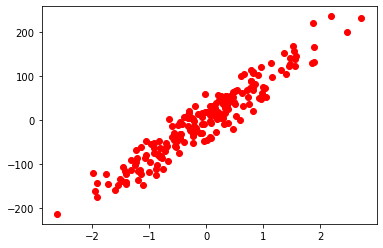

In [53]:
plt.figure()
plt.scatter(X, y, color = "red")
plt.show()


In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
learning_rate = 0.01
linearRegrresion = LinearRegression(lr = learning_rate)

In [56]:
linearRegrresion.fit(X_train,y_train)

In [57]:
y_pred = linearRegrresion.predict(X_test)

In [60]:
print(f"MSE : {mse(y_test, y_pred)}")

MSE : 683.7755336183045


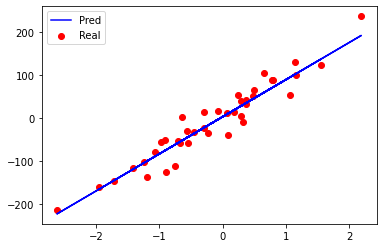

In [61]:
plt.figure()
plt.scatter(X_test, y_test, color = "r", label = "Real")
plt.plot(X_test, y_pred, color = "blue", label = "Pred")
plt.legend()
plt.show()
